# Imports

In [145]:
import pandas as pd
import numpy as np
import bz2
import json
import pickle
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from extraction_helpers import *
import os

In [31]:
# filename = open("extracted_data\output_2020 speakers_False keywords_['hurricane', 'climate change'].pickle", "rb")
# df = pickle.load(filename)

In [4]:
# Load pickle file

filename = os.listdir('./extracted_data')[0]
print("Considered file : " + "'" + filename +"'")

filename = open("extracted_data/{}".format(filename), "rb")
dict_df = pickle.load(filename)

Considered file : 'output_2019 speakers_False keywords_['hurricane', 'climate change'].pickle'


In [5]:
# print("Speakers : " + str(list(dict_df.keys())))
# print("Keywords : " + str(list(dict_df[list(dict_df.keys())[0]].keys())))

In [6]:
dict_df

{'hurricane':                 quoteID                                          quotation  \
 1     2019-02-27-008811  As governor of Florida, I saw firsthand the de...   
 2     2019-09-02-052055  The core of extremely dangerous Hurricane Dori...   
 3     2019-05-09-131870  Why go to school if we won't have a future? Wh...   
 4     2019-12-30-067171  Will 2020 give Florida a break in hurricane se...   
 5     2019-08-29-106120  We could see a weakening hurricane staying inl...   
 ...                 ...                                                ...   
 5195  2019-02-20-078267  Probably almost half our land was covered by w...   
 5196  2019-02-15-112277  We are used to hurricanes, but nothing like wh...   
 5197  2019-08-30-005357  And no, I don't wish anyone, anywhere, the hor...   
 5198  2019-10-13-041713  The bad news is we are not at all on the right...   
 5199  2019-09-06-017079  Dorian should remain a powerful hurricane as i...   
 
                    speaker          

# Treat data

In [7]:
# In each date, remove the info about hours, minutes and seconds
# This facilitates aggregating data for each day

for keyword in dict_df:
    for index, row in dict_df[keyword].iterrows():
        dict_df[keyword]['date'][index] = pd.to_datetime(str(row['date'])[:10])


<ipython-input-7-908c623ac16b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df[keyword]['date'][index] = pd.to_datetime(str(row['date'])[:10])


In [8]:
# Sort the values in ascending chronological order

for keyword in dict_df:
    dict_df[keyword] = dict_df[keyword].sort_values('date', ascending=True)


In [9]:
dict_count_occurences = {}
for keyword in dict_df:
    dict_count_occurences[keyword] = dict_df[keyword]['date'].value_counts(sort=False)

In [10]:
for keyword in dict_count_occurences:
    print(dict_count_occurences[keyword].shape)

(358,)
(365,)


In [11]:
for keyword in dict_count_occurences:
    for key in dict_count_occurences[keyword].keys():
        for keyword2 in dict_count_occurences:
            if key not in dict_count_occurences[keyword2].keys():
                dict_count_occurences[keyword2][key] = 0

for keyword in dict_count_occurences:
    dict_count_occurences[keyword].sort_index(inplace = True)

            

In [12]:
for keyword in dict_count_occurences:
    print(dict_count_occurences[keyword].shape)

(365,)
(365,)


# Plots

In [13]:
dict_count_occurences['hurricane']

2019-01-01     8
2019-01-02     4
2019-01-03    12
2019-01-04    11
2019-01-05     1
              ..
2019-12-27     3
2019-12-28     2
2019-12-29     2
2019-12-30     2
2019-12-31     2
Name: date, Length: 365, dtype: int64

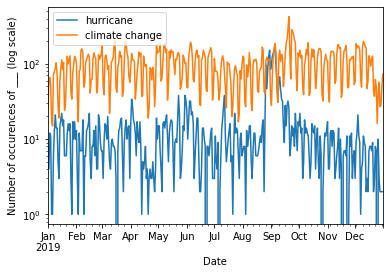

In [14]:
for keyword in dict_df:
    ax = dict_count_occurences[keyword].plot(logy = True)
ax.set_xlabel("Date")
ax.set_ylabel("Number of occurences of ___ (log scale)")
ax.legend([keyword for keyword in dict_df], loc = 'upper left')

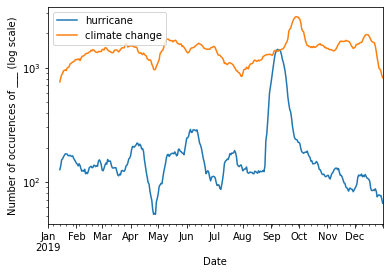

In [15]:
for keyword in dict_df:
    ax_roll = dict_count_occurences[keyword].rolling(14).sum().plot(logy = True)
ax_roll.set_xlabel("Date")
ax_roll.set_ylabel("Number of occurences of ___ (log scale)")
ax_roll.legend([keyword for keyword in dict_df], loc = 'upper left')

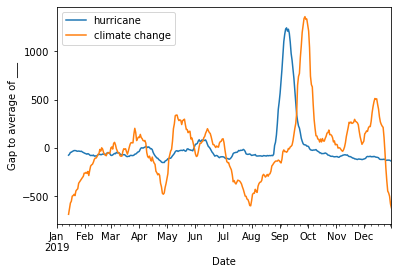

In [16]:
for keyword in dict_df:
    ax_roll = (dict_count_occurences[keyword].rolling(14).sum() - dict_count_occurences[keyword].rolling(14).sum().mean()).plot()
ax_roll.set_xlabel("Date")
ax_roll.set_ylabel("Gap to average of ___")
# ax_roll.set_ylim([300, 1500])
ax_roll.legend([keyword for keyword in dict_df], loc = 'upper left')

### EM-DAT dataset

In [51]:
# Open processed EM-DAT dataset
df_emdat = pd.read_csv("data/emdat_processed.csv", index_col = "Dis No")

In [166]:
df_emdat.head(2)

,Group,Subgroup,Type,Subtype,Subsubtype,Name,Country,ISO,Region,Continent,...,Scale,Deaths,Injured,Affected,Homeless,TotalAffected,Damages,StartDate,EndDate,Duration
Dis No,,,,,,,,,,,,,,,,,,,,,
2015-0011-MWI,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Malawi,MWI,Eastern Africa,Africa,...,Km2,278.0,645.0,638000.0,0.0,638645.0,390000.0,2015-01-01,2015-01-21,20
2015-0011-MOZ,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Mozambique,MOZ,Eastern Africa,Africa,...,Km2,160.0,0.0,177645.0,0.0,177645.0,0.0,2015-01-01,2015-02-09,39


In [165]:
df_emdat.describe()

,Magnitude,Deaths,Injured,Affected,Homeless,TotalAffected,Damages,Duration
count,1.997000e+03,1997.000000,1997.000000,1.997000e+03,1.997000e+03,1.997000e+03,1.997000e+03,1997.000000
mean,2.063805e+04,36.332999,153.139209,2.498124e+05,2.537447e+03,2.525030e+05,4.542298e+05,6.660491
std,2.023186e+05,255.457778,1936.888509,2.586658e+06,4.850959e+04,2.588110e+06,3.260667e+06,20.843387
min,-4.800000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,8.800000e+01,0.000000e+00,0.000000
50%,0.000000e+00,6.000000,0.000000,2.000000e+03,0.000000e+00,3.000000e+03,0.000000e+00,2.000000
75%,7.000000e+00,18.000000,4.000000,2.370000e+04,0.000000e+00,2.500000e+04,6.000000e+04,6.000000
max,8.000000e+06,8831.000000,58080.000000,8.500000e+07,2.000000e+06,8.500001e+07,9.500000e+07,376.000000


In [104]:
# Create dataframe of only storms from 2019
# -- A hurricane is a type of storm --
mask = ((df_emdat['StartDate'] >= '2019-01-01') & (df_emdat['StartDate'] < '2020-01-01') & (df_emdat['Type'] == 'Storm'))
df_2019 = df_emdat.copy().loc[mask]

In [108]:
df_2019.set_index(['StartDate'],inplace=True)

In [154]:
# Some disasters have same StartDate so we group them together and sum the desired column (next step)
grouped_2019 = df_2019.groupby(['StartDate'])

In [155]:
grouped_magnitude = grouped_2019['Magnitude'].sum()
grouped_damages = grouped_2019['Damages'].sum()

In [172]:
# Comvert (string) dates to datetime dates for plotting
dates_mag = [pd.to_datetime(d) for d in grouped_magnitude.index]
values_mag = grouped_magnitude.values

dates_dam = [pd.to_datetime(d) for d in grouped_damages.index]
values_dam = grouped_damages.values

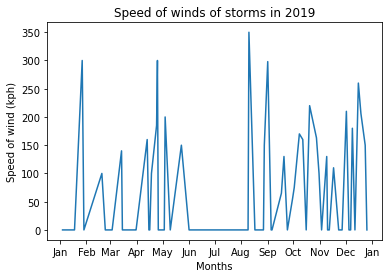

In [173]:
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.xlabel('Months')
plt.ylabel('Speed of wind (kph)')
plt.title('Speed of winds of storms in 2019')
plt.plot(dates_mag, values_mag)
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

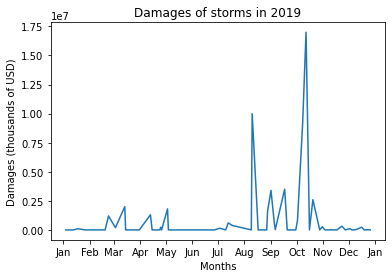

In [169]:
plt.xlabel('Months')
plt.ylabel('Damages (thousands of USD)')
plt.title('Damages of storms in 2019')
plt.plot(dates_dam, values_dam)
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

# Correlations

In [22]:
from statsmodels.tsa.stattools import ccf

In [31]:
hurr_n = dict_count_occurences['hurricane']
clim_n = dict_count_occurences['climate change']

<AxesSubplot:>

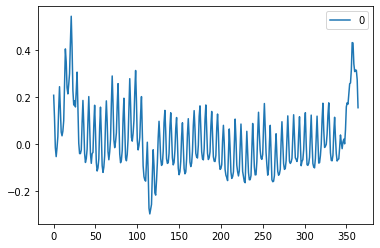

In [40]:
output_ccf = ccf(clim_n, hurr_n)
pd.DataFrame(output_ccf).plot()

Text(20, 0    0.857116
dtype: float64, 'max : 0.71 for a shift of 20 days')

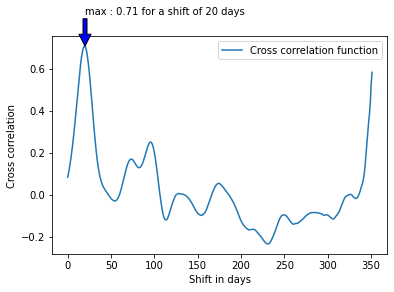

In [75]:
rolling = 14
hurr_r = dict_count_occurences['hurricane'].rolling(rolling).sum()[rolling-1:]
clim_r = dict_count_occurences['climate change'].rolling(rolling).sum()[rolling-1:]

output_ccf = pd.DataFrame(ccf(clim_r, hurr_r))
ax = output_ccf.plot()
ax.legend(['Cross correlation function'])
ax.set_xlabel("Shift in days")
ax.set_ylabel("Cross correlation")

ymax = output_ccf.max()
xpos = np.where(output_ccf == ymax)
xmax = xpos[0][0]

ax.annotate('max : {} for a shift of {} days'.format(round(float(ymax),2), xmax), xy=(xmax, ymax), \
    xytext=(xmax, ymax + 0.15), arrowprops=dict(facecolor='blue'),)
